# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
Let's focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

Reading data from Google finance using pandas!

Let's start with the proper imports.

Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html). Use these links for install guidance (*pip install pandas-datareader*)
### Imports

In [3]:
from pandas_datareader import data, wb
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import datetime
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

%matplotlib inline

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

bank_stocks.head()

Bank Ticker   BAC                                              C         \
Stock Info   High   Low  Open Close      Volume Adj Close   High    Low   
Date                                                                      
2006-01-03  47.18 46.15 46.92 47.08 16296700.00     35.52 493.80 481.10   
2006-01-04  47.24 46.45 47.00 46.58 17757900.00     35.15 491.00 483.50   
2006-01-05  46.83 46.32 46.58 46.64 14970700.00     35.19 487.80 484.00   
2006-01-06  46.91 46.35 46.80 46.57 12599800.00     35.14 489.00 482.00   
2006-01-09  46.97 46.36 46.72 46.60 15619400.00     35.16 487.40 483.00   

Bank Ticker                                        GS                       \
Stock Info    Open  Close     Volume Adj Close   High    Low   Open  Close   
Date                                                                         
2006-01-03  490.00 492.90 1537600.00    445.56 129.44 124.23 126.70 128.87   
2006-01-04  488.60 483.80 1870900.00    437.34 128.91 126.38 127.35 127.09   
2006-01-05  484.40 486.20 1143100.00    439.51 127.32 125.61 126.00 127.04   
2006-01-06  488.80 486.20 1370200.00    439.51 129.25 127.29 127.29 128.84   
2006-01-09  486.00 483.90 1680700.00    437.43 130.62 128.00 128.50 130.39   

Bank Ticker                        JPM                                \
Stock Info      Volume Adj Close  High   Low  Open Close      Volume   
Date                                                                   
2006-01-03  6188700.00    108.23 40.36 39.30 39.83 40.19 12838600.00   
2006-01-04  4861600.00    106.74 40.14 39.42 39.78 39.62 13491500.00   
2006-01-05  3717400.00    106.70 39.81 39.50 39.61 39.74  8109400.00   
2006-01-06  4319600.00    108.21 40.24 39.55 39.92 40.02  7966900.00   
2006-01-09  4723500.00    109.51 40.72 39.88 39.88 40.67 16575200.00   

Bank Ticker              MS                                          WFC  \
Stock Info  Adj Close  High   Low  Open Close     Volume Adj Close  High   
Date                                                                       
2006-01-03      27.82 58.49 56.74 57.17 58.31 5377000.00     37.76 31.98   
2006-01-04      27.66 59.28 58.35 58.70 58.35 7977800.00     37.78 31.82   
2006-01-05      27.74 58.59 58.02 58.55 58.51 5778000.00     37.89 31.56   
2006-01-06      27.93 58.85 58.05 58.77 58.57 6889800.00     37.93 31.77   
2006-01-09      28.39 59.29 58.62 58.63 59.19 4144500.00     38.33 31.83   

Bank Ticker                                          
Stock Info    Low  Open Close      Volume Adj Close  
Date                                                 
2006-01-03  31.19 31.60 31.90 11016400.00     21.05  
2006-01-04  31.36 31.80 31.53 10870000.00     20.80  
2006-01-05  31.31 31.50 31.50 10158000.00     20.78  
2006-01-06  31.39 31.58 31.68  8403800.00     20.90  
2006-01-09  31.56 31.67 31.67  5619600.00     20.90

# EDA

Let's explore the data a bit!

### What is the max Close price for each bank's stock throughout the time period?

In [6]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC    54.90
C     564.10
GS    247.92
JPM    70.08
MS     89.30
WFC    58.52
dtype: float64

- **Citigroup** stocks have the highest close price followed by **Goldman Sachs** and the others.

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [7]:
returns = pd.DataFrame()

**We use pandas *pct_change()* method on the Close column to create a column representing this return value.**

In [8]:
for i in tickers:
    returns[i+' Return'] = bank_stocks[i]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,nan,nan,nan,nan,nan,nan
2006-01-04,-0.01,-0.02,-0.01,-0.01,0.00,-0.01
2006-01-05,0.00,0.00,-0.00,0.00,0.00,-0.00
2006-01-06,-0.00,0.00,0.01,0.01,0.00,0.01
2006-01-09,0.00,-0.00,0.01,0.02,0.01,-0.00


### What stock stands out?

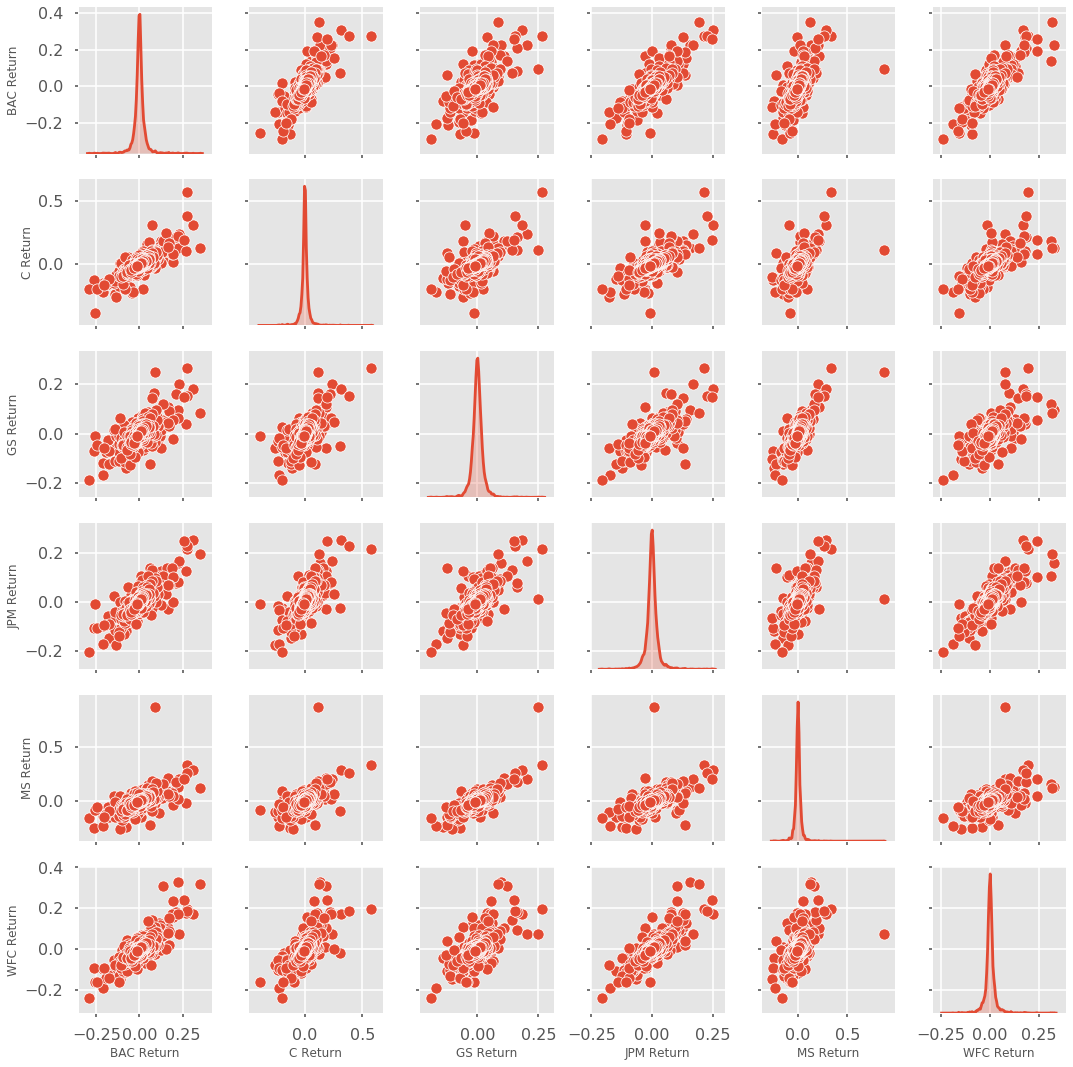

In [9]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:], diag_kind='kde')

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

### What dates each bank stock had the best and worst single day returns?

In [10]:
# Worst Drop
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

- **Bank of America, Goldman Sachs, JPMorgan Chase** and **Wells Fargo** have the same worst single day returns.

The first inauguration of Barack Obama as the 44th President of the United States took place on Tuesday, January 20, 2009, this might be the reason for the similar drop among these companies.

In [11]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

- Also notice how **Citigroup** and **Goldman Sachs** have similar gain.

Also, [Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

**Let's look at the standard deviation of the returns.**

In [12]:
returns.std() #  riskiest

BAC Return   0.04
C Return     0.04
GS Return    0.03
JPM Return   0.03
MS Return    0.04
WFC Return   0.03
dtype: float64

- **Citigroup** stocks are the riskiest over the entire time period.
- Other stocks have somewhat very **similar** risk profiles.

**Distplot of the 2015 returns for Morgan Stanley**

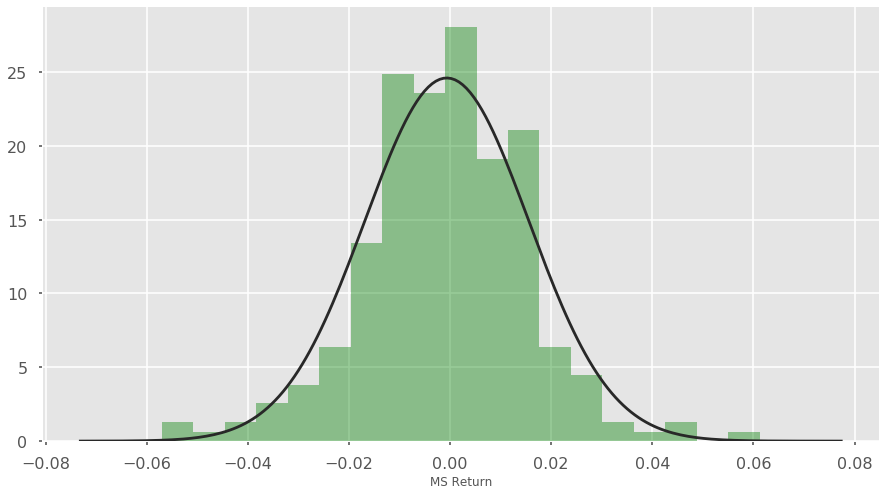

In [13]:
plt.figure(figsize=(15,8));
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green', fit=stats.norm, kde=False);

- **Morgan Stanley** stocks dont seem to vary much during 2015.

**Distplot of the 2008 returns for CitiGroup**

<Figure size 1080x576 with 0 Axes>

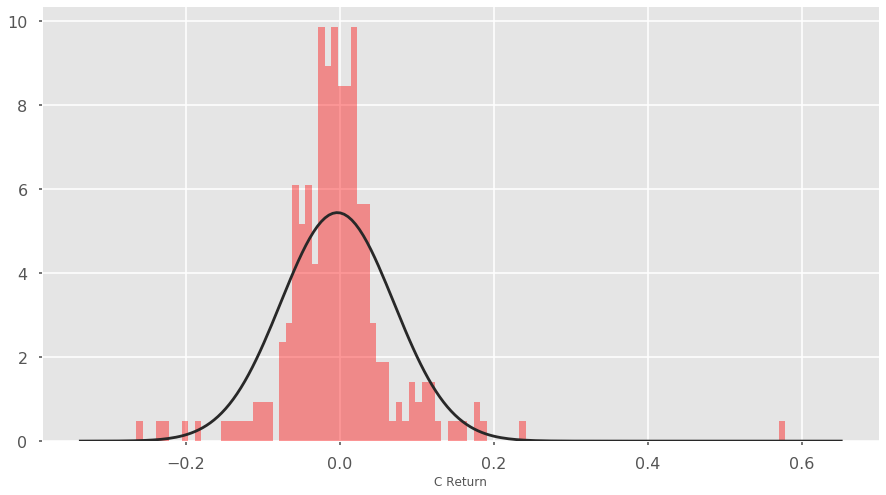

In [14]:
plt.figure(figsize=(15,8));
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100, fit=stats.norm, kde=False)

- **Citigroup** stocks increased over a certain period of time but later dropped, indicating riskiness.

**Line plot showing Close price for each bank for the entire index of time.**

In [15]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

**Rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

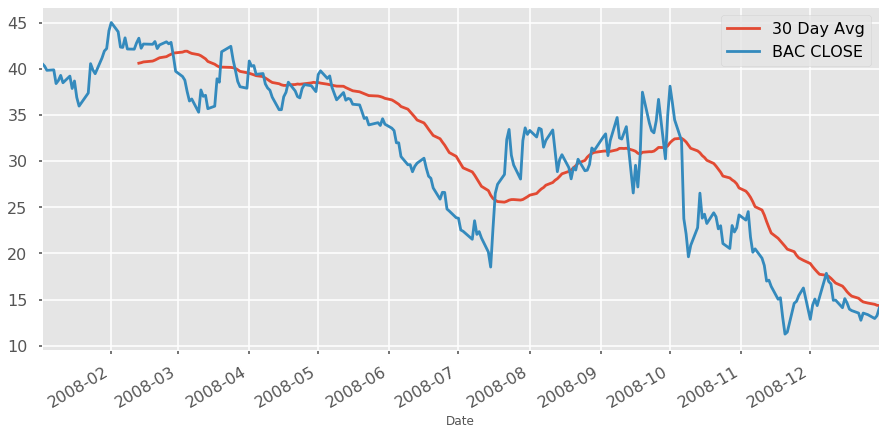

In [16]:
plt.figure(figsize=(15,7));
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg');
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE');
plt.legend();

**A heatmap of the correlation between the stocks Close Price.**

<Figure size 1080x1080 with 0 Axes>

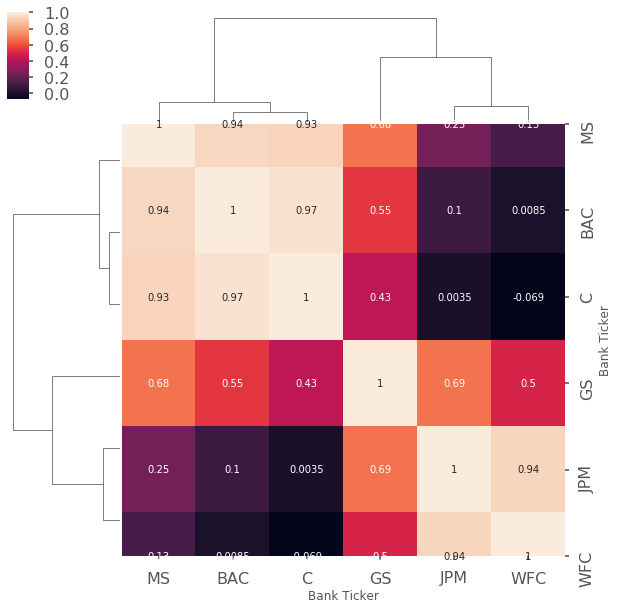

In [17]:
plt.figure(figsize=(15,15));
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True);

- Bank of America, Citigroup and Morgan Stanley have a very strong positive correlation among them indicating as one increases, other one increases too.
- JPMorgan Chase and Wells Fargo also have a strong postive correlation.

____